In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [184]:
Fraud=pd.read_excel('Training_Fraud_data3.xlsx')

In [8]:
Fraud

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Data_FLAG
0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,TRAINING
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,TRAINING
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,TRAINING
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,TRAINING
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,TRAINING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2019-01-04 05:09:49,2235335206132660,fraud_Lynch Ltd,shopping_pos,1180.30,Maria,Rosales,F,6611 Parrish Garden Apt. 428,Waynesfield,...,-83.9585,2089,Building control surveyor,1963-06-22,44827746427d28ce90c337b84cdad67c,1325653789,40.438221,-83.485925,0,TRAINING
4996,2019-01-04 05:12:33,375237305371366,fraud_Friesen-Stamm,gas_transport,83.47,David,Erickson,M,616 Jimenez Meadow Apt. 701,East Rochester,...,-77.4906,8019,Retail buyer,1928-06-26,51669b87249060cc80b9af943c9869af,1325653953,42.415407,-78.158282,0,TRAINING
4997,2019-01-04 05:13:23,2235335206132660,fraud_Paucek-Wiza,grocery_net,36.64,Maria,Rosales,F,6611 Parrish Garden Apt. 428,Waynesfield,...,-83.9585,2089,Building control surveyor,1963-06-22,eb74899e4d7095d2445ac4e4eb6ae473,1325654003,40.958936,-84.629338,0,TRAINING
4998,2019-01-04 05:14:46,502012776709,fraud_Welch Inc,misc_net,6.21,Sherry,Martinez,F,144 Yu Locks Apt. 754,Garrattsville,...,-75.1866,165,Naval architect,1945-09-20,eaf4f0819ce9a160401c14d462b942bf,1325654086,43.269532,-76.124026,0,TRAINING


In [10]:
Fraud.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Data_FLAG                0
dtype: int64

In [122]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  5000 non-null   int64  
 1   cc_num                 5000 non-null   int64  
 2   merchant               5000 non-null   int32  
 3   category               5000 non-null   int64  
 4   amt                    5000 non-null   float64
 5   first                  5000 non-null   int32  
 6   last                   5000 non-null   int64  
 7   gender                 5000 non-null   int32  
 8   street                 5000 non-null   int32  
 9   city                   5000 non-null   int32  
 10  state                  5000 non-null   int32  
 11  zip                    5000 non-null   int64  
 12  lat                    5000 non-null   float64
 13  long                   5000 non-null   float64
 14  city_pop               5000 non-null   float64
 15  job 

In [7]:
Fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Data_FLAG'],
      dtype='object')

In [12]:
#Encoding and transcribing of the catigorical column
from sklearn.preprocessing import LabelEncoder

In [14]:
#creating an object from the Label Encoding class
Le = LabelEncoder()
Fraud["merchant"] = Le.fit_transform(Fraud["merchant"])

In [17]:
Fraud['category'] = Le.fit_transform(Fraud['category'])

In [18]:
Fraud['first'] = Le.fit_transform(Fraud['first'])

In [20]:
Fraud['last'] = Le.fit_transform(Fraud['last'])

In [21]:
Fraud['gender'] = Le.fit_transform(Fraud['gender'])

In [22]:
Fraud['street'] = Le.fit_transform(Fraud['street'])

In [23]:
Fraud['city'] = Le.fit_transform(Fraud['city'])

In [24]:
Fraud['state'] = Le.fit_transform(Fraud['state'])

In [25]:
Fraud['job'] = Le.fit_transform(Fraud['job'])

In [26]:
Fraud['trans_num'] = Le.fit_transform(Fraud['trans_num'])

In [27]:
Fraud['Data_FLAG'] = Le.fit_transform(Fraud['Data_FLAG'])

In [28]:
#trans_date_trans_time
Fraud['trans_date_trans_time'] = (Fraud['trans_date_trans_time'] - pd.Timestamp("1970-01-01")).dt.days

In [29]:
Fraud['dob'] = (Fraud['dob'] - pd.Timestamp("1970-01-01")).dt.days

In [30]:
Fraud

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Data_FLAG
0,17897,2703186189652090,513,8,4.97,149,17,0,507,482,...,-81.1781,3495,347,6642,223,1325376018,36.011293,-82.048315,0,0
1,17897,630423337322,241,4,107.23,285,147,0,394,555,...,-118.2105,149,402,3093,592,1325376044,49.159047,-118.186462,0,0
2,17897,38859492057661,389,0,220.11,104,361,1,540,429,...,-112.2620,4154,286,-2904,3117,1325376051,43.150704,-112.154481,0,0
3,17897,3534093764340240,359,2,45.00,150,434,1,828,81,...,-112.1138,1939,307,-1085,2067,1325376076,47.034331,-112.561071,0,0
4,17897,375534208663984,297,9,41.96,311,139,1,379,202,...,-79.4629,99,105,5930,3164,1325376186,38.674999,-78.632459,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,17900,2235335206132660,399,12,1180.30,212,353,0,594,768,...,-83.9585,2089,46,-2385,1296,1325653789,40.438221,-83.485925,0,0
4996,17900,375237305371366,183,2,83.47,84,108,1,557,217,...,-77.4906,8019,375,-15164,1548,1325653953,42.415407,-78.158282,0,0
4997,17900,2235335206132660,477,3,36.64,212,353,0,594,768,...,-83.9585,2089,46,-2385,4593,1325654003,40.958936,-84.629338,0,0
4998,17900,502012776709,660,8,6.21,279,247,0,121,266,...,-75.1866,165,287,-8869,4577,1325654086,43.269532,-76.124026,0,0


In [ ]:
#Eliminate possible outliers by generating box-whisker plots.

In [33]:
lowerLimit = Fraud['cc_num'].quantile(0.00)
upperLimit = Fraud['cc_num'].quantile(0.90)
lowerLimit

60416207185.0

In [34]:
upperLimit

6575412448379496.0

In [39]:
Fraud['cc_num'] = Fraud['cc_num'].clip(lowerLimit, upperLimit)

<Axes: ylabel='cc_num'>

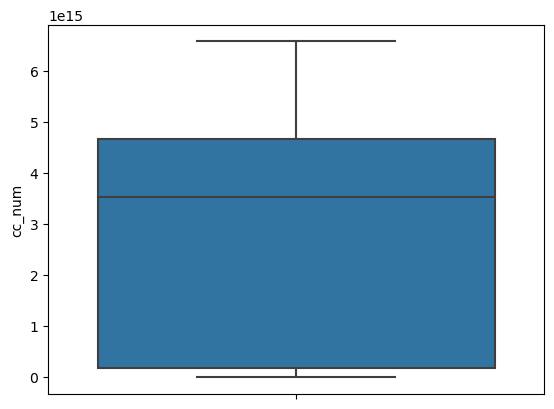

In [40]:
sns.boxplot(y='cc_num', data=Fraud)

In [57]:
lowerLimit = Fraud['amt'].quantile(0.00)
upperLimit = Fraud['amt'].quantile(0.94)
lowerLimit

1.03

In [58]:
upperLimit

177.13779999999994

In [59]:
Fraud['amt'] = Fraud['amt'].clip(lowerLimit, upperLimit)

<Axes: ylabel='amt'>

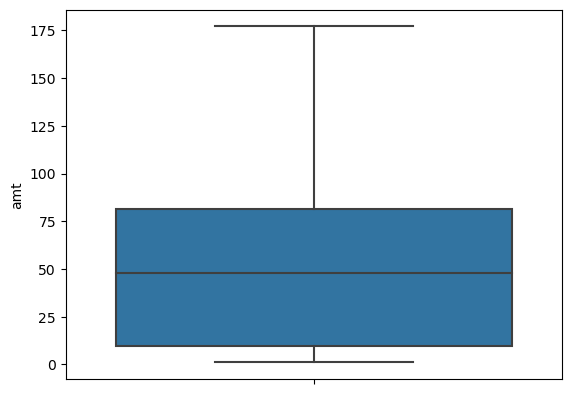

In [60]:
sns.boxplot(y='amt', data=Fraud)

<Axes: ylabel='zip'>

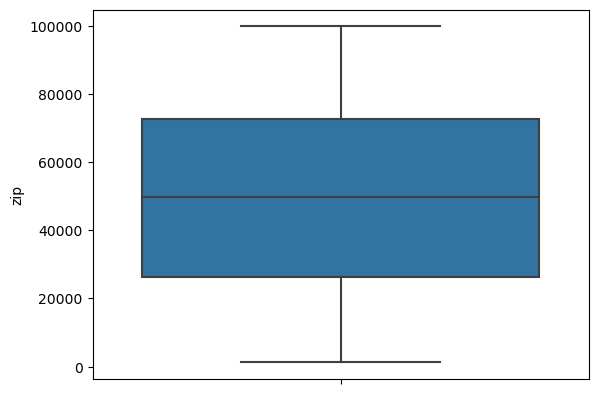

In [63]:
sns.boxplot(y='zip', data=Fraud)

In [76]:
lowerLimit = Fraud['lat'].quantile(0.05)
upperLimit = Fraud['lat'].quantile(0.97)
lowerLimit

29.9912

In [74]:
upperLimit

47.0999

In [78]:
Fraud['lat'] = Fraud['lat'].clip(lowerLimit, upperLimit)

<Axes: ylabel='lat'>

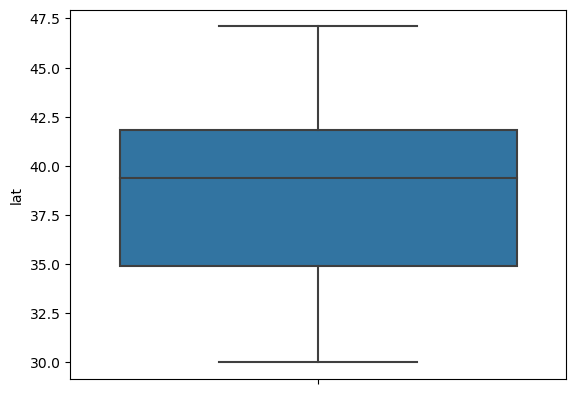

In [79]:
sns.boxplot(y='lat', data=Fraud)

In [82]:
lowerLimit = Fraud['long'].quantile(0.05)
upperLimit = Fraud['long'].quantile(0.99)
lowerLimit

-120.6763

In [83]:
upperLimit

-70.2389999999999

In [84]:
Fraud['long'] = Fraud['long'].clip(lowerLimit, upperLimit)

<Axes: ylabel='long'>

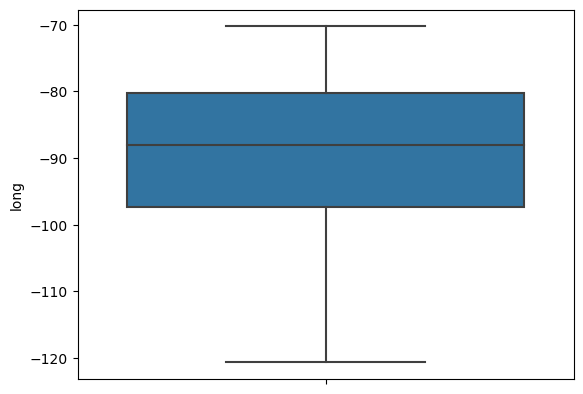

In [86]:
sns.boxplot(y='long', data=Fraud)

In [111]:
lowerLimit = Fraud['city_pop'].quantile(0.05)
upperLimit = Fraud['city_pop'].quantile(0.77)
lowerLimit

149.0

In [112]:
upperLimit

24840.0

In [113]:
Fraud['city_pop'] = Fraud['city_pop'].clip(lowerLimit, upperLimit)

<Axes: ylabel='city_pop'>

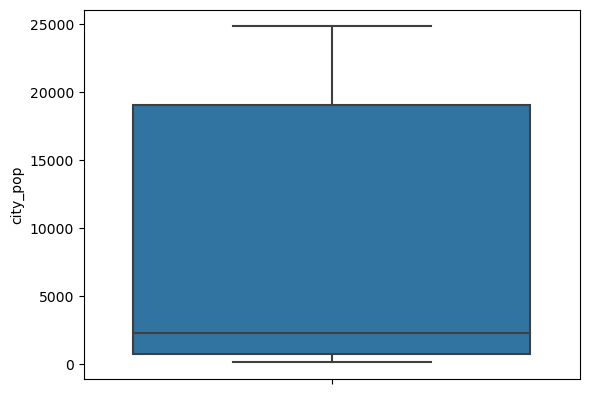

In [114]:
sns.boxplot(y='city_pop', data=Fraud)

<Axes: ylabel='unix_time'>

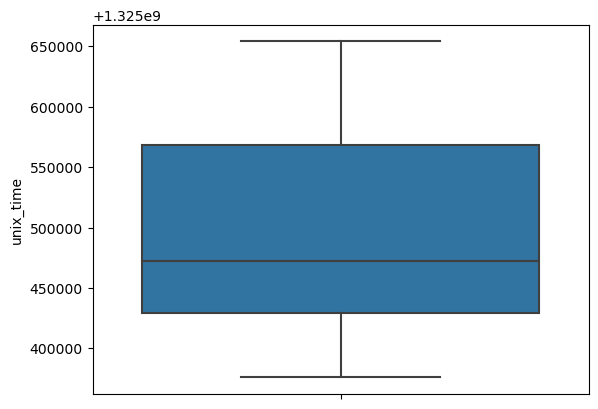

In [115]:
sns.boxplot(y='unix_time', data=Fraud)

In [117]:
lowerLimit = Fraud['merch_lat'].quantile(0.05)
upperLimit = Fraud['merch_lat'].quantile(0.99)
lowerLimit

29.7787498

In [119]:
upperLimit

48.83391390000001

In [120]:
Fraud['merch_lat'] = Fraud['merch_lat'].clip(lowerLimit, upperLimit)

<Axes: ylabel='merch_lat'>

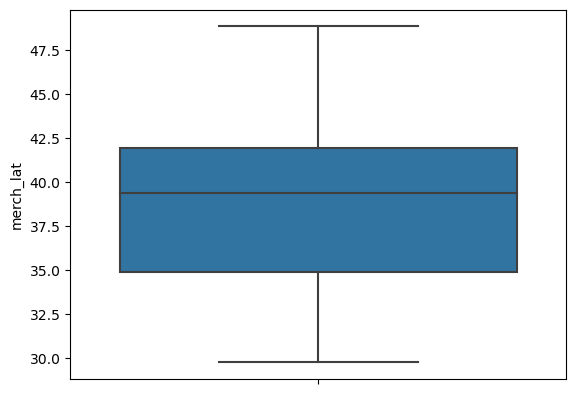

In [121]:
sns.boxplot(y='merch_lat', data=Fraud)

In [133]:
lowerLimit = Fraud['merch_long'].quantile(0.05)
upperLimit = Fraud['merch_long'].quantile(0.99)
lowerLimit

-120.8107016

In [134]:
upperLimit

-70.12177091

In [137]:
Fraud['merch_long'] = Fraud['merch_long'].clip(lowerLimit, upperLimit)

<Axes: ylabel='merch_long'>

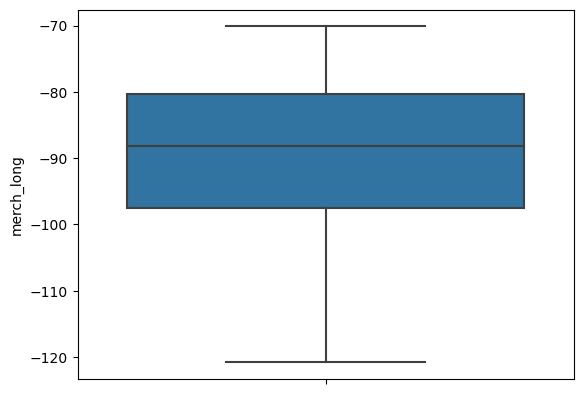

In [138]:
sns.boxplot(y='merch_long', data=Fraud)

In [139]:
X = Fraud[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long']].values


In [142]:
Y= Fraud['is_fraud']. values

In [144]:
from sklearn.svm import LinearSVC

In [147]:
#Then we create our model object from the SVC class
model = LinearSVC()

In [148]:
#We train our model with the dataset below

model.fit(X,Y)

C:\Users\visit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\visit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [149]:
#To predict we import the test dataset

pd.read_excel('Test_Fraud_data4.xlsx')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Data_FLAG
0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,TESTING
1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,TESTING
2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,TESTING
3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,TESTING
4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,TESTING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2020-06-21 23:49:13,676369110710,fraud_Waelchi Inc,kids_pets,20.42,David,Wolfe,M,81261 Garcia Underpass Suite 741,Southfield,...,-83.2911,75830,"Engineer, automotive",1974-12-28,3cb1772c9cd885d1a6f747d1e6c952fb,1371858553,42.443288,-83.600238,0,TESTING
1995,2020-06-21 23:49:25,345933964507467,fraud_O'Hara-Wilderman,food_dining,2.64,Carol,Dillon,F,27479 Reeves Dale,Whaleyville,...,-75.2811,718,Regulatory affairs officer,1985-03-19,db9609979b2c8c9af5c60a02448895ac,1371858565,38.579881,-74.493330,0,TESTING
1996,2020-06-21 23:49:36,4607072969078270,"fraud_Streich, Rolfson and Wilderman",kids_pets,86.23,Brenda,Perez,F,033 Tara Brook Suite 523,Coyle,...,-97.2607,1493,Amenity horticulturist,1985-03-21,a58c8deeb72c9ee7646c741a58ce7c26,1371858576,35.069578,-97.572451,0,TESTING
1997,2020-06-21 23:49:49,6011504998544480,"fraud_Boehm, Predovic and Reinger",misc_pos,36.13,Ashley,Whitney,F,4038 Smith Avenue,Jones,...,-86.8138,1089,Materials engineer,1971-11-02,9fbee0d9611b6a85b824bdfd1b3acd13,1371858589,33.010868,-86.798841,0,TESTING


In [150]:
Fraud_Test=pd.read_excel('Test_Fraud_data4.xlsx')

In [151]:
Fraud_Test.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Data_FLAG                0
dtype: int64

In [152]:
Fraud_Test.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Data_FLAG'],
      dtype='object')

In [153]:
Fraud_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  1999 non-null   datetime64[ns]
 1   cc_num                 1999 non-null   int64         
 2   merchant               1999 non-null   object        
 3   category               1999 non-null   object        
 4   amt                    1999 non-null   float64       
 5   first                  1999 non-null   object        
 6   last                   1999 non-null   object        
 7   gender                 1999 non-null   object        
 8   street                 1999 non-null   object        
 9   city                   1999 non-null   object        
 10  state                  1999 non-null   object        
 11  zip                    1999 non-null   int64         
 12  lat                    1999 non-null   float64       
 13  lon

In [154]:
#Encoding and transcribing of the catigorical column

In [155]:
Fraud_Test["merchant"] = Le.fit_transform(Fraud_Test["merchant"])

In [156]:
Fraud_Test['category'] = Le.fit_transform(Fraud_Test['category'])

In [157]:
Fraud_Test['first'] = Le.fit_transform(Fraud_Test['first'])

In [158]:
Fraud_Test['last'] = Le.fit_transform(Fraud_Test['last'])

In [159]:
Fraud_Test['gender'] = Le.fit_transform(Fraud_Test['gender'])

In [160]:
Fraud_Test['street'] = Le.fit_transform(Fraud_Test['street'])

In [161]:
Fraud_Test['city'] = Le.fit_transform(Fraud_Test['city'])

In [162]:
Fraud_Test['state'] = Le.fit_transform(Fraud_Test['state'])

In [163]:
Fraud_Test['job'] = Le.fit_transform(Fraud_Test['job'])

In [165]:
Fraud_Test['trans_num'] = Le.fit_transform(Fraud_Test['trans_num'])

In [166]:
Fraud_Test['Data_FLAG'] = Le.fit_transform(Fraud_Test['Data_FLAG'])

In [167]:
#trans_date_trans_time
Fraud_Test['trans_date_trans_time'] = (Fraud_Test['trans_date_trans_time'] - pd.Timestamp("1970-01-01")).dt.days

In [169]:
Fraud_Test['dob'] = (Fraud_Test['dob'] - pd.Timestamp("1970-01-01")).dt.days

In [170]:
A = Fraud_Test[['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long']].values

In [171]:
B = Fraud_Test['is_fraud']. values

In [172]:
# Make predictions on the test set
Z_pred =model.predict(A)

In [173]:
Z_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [179]:
#Now to evaluate the model’s prediction, because it is a classification algorithm, we use the confusion_matrix or 
#accuracy_score or classification_report.

from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(B,Z_pred)


array([[1990,    0],
       [   9,    0]], dtype=int64)

In [176]:
accuracy_score(B,Z_pred)

0.9954977488744372

In [178]:
#Then we can visualize the results using heatmap below
cm = confusion_matrix(B, Z_pred)
cm

array([[1990,    0],
       [   9,    0]], dtype=int64)

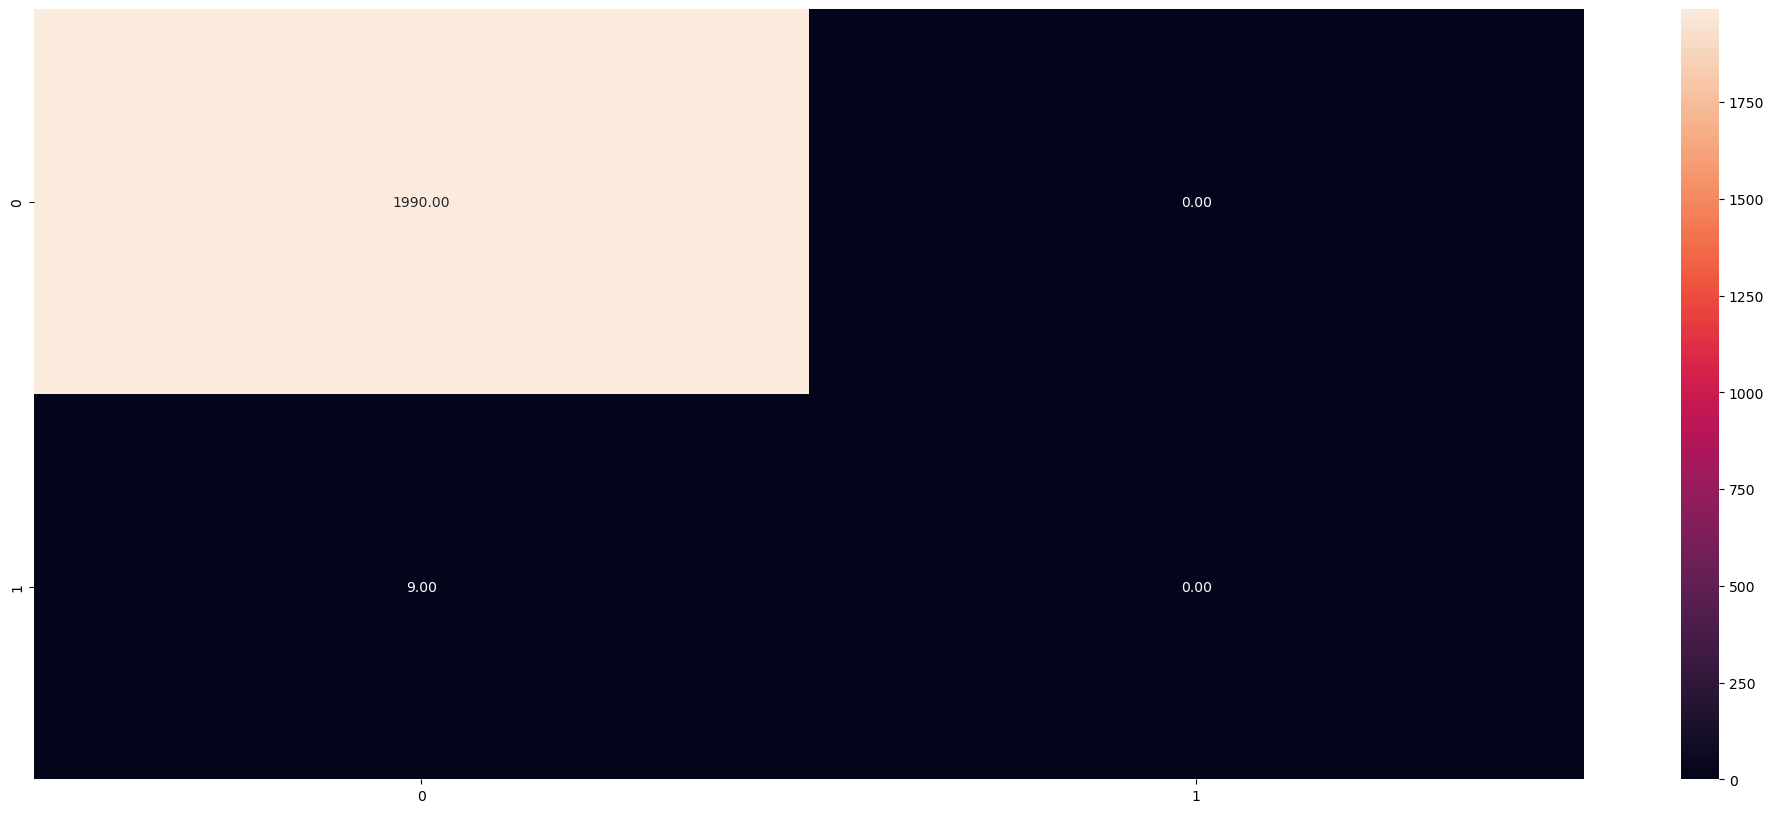

In [185]:
# Visualize the confusion matrix using Seabornsns.heatmap(cm, annot=True, fmt="d")
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.show()